# An introduction to training neural networks

Welcome! If you are new to building neural networks, you will enjoy this basic introduction to machine learning. Its a hands-on tutorial that will walk you through a classic example of fitting a neural network, Tensorflow, Keras, and the MNIST dataset.


## Packages 
First we are going to import the necessary packages. Tensorflow is a machine learning framework developed by Google and Keras was a framework which was added to Tensorflow to simplify the creation of layers in a neural network. This cell imports those libraries along with matplotlib and numpy--a numerical library for python.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt

import logging
from public_tests import * 


2024-05-16 21:51:07.485160: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.4/lib64
2024-05-16 21:51:07.485177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Neural networks are universal function approximators which means we can use them to learn to map any input to any output. For our case, we will be doing image classification using the MNIST handwritten digit dataset. First lets import the dataset.

In [36]:
import keras
(X, y), (x_test, y_test) = keras.datasets.mnist.load_data()
X = X.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Visualize the Data
Now lets visualize the first training data item, which is the number 5.

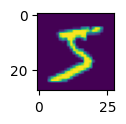

In [51]:
%matplotlib inline
plt.figure(figsize=(1, 1))
plt.imshow(X[0].reshape(28, 28))
plt.show()

# Train the model
We are going to perform supervised classification against the target Y values. Just for fun, we are going to set up the model to return the 10 final output logits so we can have a look at them.

In [44]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(512, activation='relu', name = "L1"),
        Dense(256, activation='relu', name = "L2"),
        Dense(64, activation='relu',  name = "L3"),
        Dense(10, activation='linear', name = "L4"),
    ], name = "mnist_model" 
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=25
)

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8818
Epoch 2/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2277
Epoch 3/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1578
Epoch 4/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1280
Epoch 5/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1099
Epoch 6/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0970
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0874
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0792
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0756
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683
Epoch 11/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0572
Epoch 12/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0605
E

Now that the model is trained, lets take a look at those output logits. The logits correspond to the prediction digits 0-9. The one logit with the largest value will be the value returned in the argmax function.

In [65]:
logits = model.predict(X[0].reshape(1, -1))
print(logits)
print('the model classifies this as a', np.argmax(tf.nn.softmax(logits)))


1/1 [==============================] - 0s 16ms/step
[[  99.14376    13.202532   60.50213   114.660706 -283.11496   127.66067
   104.22364   -25.091702   99.30108    89.00973 ]]
the model classifies this as a 5


Finally, lets evaluate the prediction accuracy of the model against the test data. Unfortunately, due to the way we set up the model, we cannot simply run model.evaluate. Instead we will call model.predict, then convert the logits into probabilities, and finally call argmax to extract the yhat classifications.

In [64]:
test_logits = model.predict(x_test)
test_yhat = np.argmax(tf.nn.softmax(results), axis=1)
acc = (test_yhat == y_test).mean()
print('test accuracy', acc)

313/313 [==============================] - 1s 2ms/step
test accuracy 0.9764


The model achieves 97% classification accuracy on the held out test set!

If you made it to the end, congratulations on completing this introduction to modeling with neural networks. 

This tutorial was adapted from a lecture from Andrew Ng's class on Advanced Learning Algorithms.

# Resources
* Please checkout [deeplearning.ai](deeplearning.ai) to learn more about deep learning.
* [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Model)
* [Tensorflow](https://www.tensorflow.org/)